In [604]:
import pandas as pd
import numpy as np
import sys
import os
from bs4 import BeautifulSoup
from IPython.display import display, HTML
from datetime import datetime
import re



# import footballmanager
from footballmanager import parse_html_table, open_dir, convert_to_numeric
from footballmanager import imperial_to_decimal_height, weight_to_decimal_weight, convert_percent_string_to_decimal
from footballmanager import determine_goal_differential, determine_expires_date


import importlib
#importlib.reload(footballmanager)

In [605]:
# del(imperial_to_decimal_height)
imperial_to_decimal_height

<function footballmanager.imperial_to_decimal_height(height: str) -> float>

# Import FM HTML data

In [606]:
# IMPORT_FILE = 'Scouting_Dump_Oct_2025.html'
IMPORT_FILE = r'C:\Users\lover\OneDrive\Documents\Sports Interactive\Football Manager 2024\data_dumps\Full_Scouting_Dec_2029.html'
#IMPORT_FILE = r'C:\Users\lover\OneDrive\Documents\Sports Interactive\Football Manager 2024\data_dumps\Foo_Dec_2029.html'

#IMPORT_FILE = r'C:\Users\lover\OneDrive\Documents\Sports Interactive\Football Manager 2024\data_dumps\Pharco_Dump_Jul_2028.html'
#IMPORT_FILE = r'C:\Users\lover\OneDrive\Documents\Sports Interactive\Football Manager 2024\data_dumps\Urawa_Dec_2029.html'

EXPORT_NAME = IMPORT_FILE.split("\\")[-1].replace(".html","") + ".csv"
EXPORT_NAME

'Full_Scouting_Dec_2029.csv'

In [607]:
os.getcwd()

'C:\\Users\\lover\\OneDrive\\Documents\\GitHub\\football_manager_code\\AI'

In [608]:
scouting_data = parse_html_table(IMPORT_FILE)
scouting_data.head()

,Name,UID,Best Pos,Best Role,Best Duty,Pros,Cons,On Loan From,Asking Price,Gls,...,Conv %,Clr/90,Clear,CCC,Ch C/90,Blk/90,Blk,Asts/90,Aer A/90,Inf
0,Issa Kaboré,13196665,D/WB (RL),Wing-Back,Support,Unknown,Unknown,,-,0,...,-,0.62,18,0,-,0.45,13,0.14,1.93,
1,Gastón Ávila,14207518,D (C),Inverted Full-Back,Defend,Unknown,Unknown,,-,0,...,-,0.50,1,0,-,-,0,0.50,4.00,
2,Nicolás Paz,14211016,D/WB (RL),Ball Playing Defender,Defend,Unknown,Unknown,,-,1,...,3%,1.13,43,4,0.42,0.39,15,0.11,5.39,Wnt
3,Fernando Prado,14243900,D (C),Central Defender,Stopper,Unknown,Unknown,,$875K,0,...,-,1.24,30,4,0.21,0.78,19,-,6.31,Lst
4,Ezequiel Herrera,14246680,D (RL),Full-Back,Defend,Unknown,Unknown,,-,0,...,-,1.11,6,0,-,0.19,1,0.19,6.48,


In [609]:
len(scouting_data)

222

In [610]:
scouting_data.columns

Index(['Name', 'UID', 'Best Pos', 'Best Role', 'Best Duty', 'Pros', 'Cons',
       'On Loan From', 'Asking Price', 'Gls',
       ...
       'Conv %', 'Clr/90', 'Clear', 'CCC', 'Ch C/90', 'Blk/90', 'Blk',
       'Asts/90', 'Aer A/90', 'Inf'],
      dtype='object', length=202)

In [611]:
len(scouting_data.columns)

202

In [612]:
for col in scouting_data.columns:
    print(col)

Name
UID
Best Pos
Best Role
Best Duty
Pros
Cons
On Loan From
Asking Price
Gls
Caps
Yth Gls
Yth Apps
Transfer Value
Media Handling
Personality
Age
Preferred Foot
Weight
Height
2nd Nat
Nat
Expires
Salary
Based
Club
Acc
Wor
Vis
Thr
Tec
Tea
Tck
Str
Sta
TRO
Ref
Pun
Pos
Pen
Pas
Pac
1v1
OtB
Nat
Mar
L Th
Lon
Ldr
Kic
Jum
Hea
Han
Fre
Fla
Fir
Fin
Ecc
Dri
Det
Dec
Cro
Cor
Cnt
Cmp
Com
Cmd
Bra
Bal
Ant
Agi
Agg
Aer
Yel
AT Apps
AT Gls
AT Lge Apps
AT Lge Gls
xG
Saves/90
Tgls/90
Tcon/90
Tall
Tgls
Starts
Shutouts
Red
Pts/Gm
PoM
Pen/R
Pens S
Pens Saved Ratio
Pens Saved
Pens Faced
Pens
NP-xG/90
NP-xG
Last Gl
Last C
Mins/Gm
Mins
Last 5 Games
Last 5 FT Games
Int Conc
Int Av Rat
Int Ast
Int Apps
Gls/90
All/90
Conc
Won
G. Mis
Lost
D
Gwin
Fls
FA
xG/90
xG-OP
xA/90
xA
Cln/90
Av Rat
Mins/Gl
Ast
Apps
Hdrs A
Tck/90
Tck W
Tck A
Tck R
Shot/90
Shot %
ShT/90
ShT
Shots Outside Box/90
Shts Blckd/90
Shts Blckd
Shots
Svt
Svp
Svh
Sv %
Pr passes/90
Pr Passes
Pres C/90
Pres C
Pres A/90
Pres A
Poss Won/90
Poss Lost/90
Ps C/90
Ps 

We need to exclude some columns and the rest we need to cast into numerical data and/or clean accordingly.

In [613]:
EXCLUDE_COLS = """Inf
Name
Apps
Best Pos
Best Role
Best Duty
Pros
Expires
Distance
Dist/90
Cons
Position
Club
On Loan From
Based
Asking Price
Salary
Nat
2nd Nat
Home Grown Status
Height
Weight
Preferred Foot
Personality
Media Handling
Shot %
Pas %
OP-Cr %
Conv %
Hdr %
xSv %
Sv %
Transfer Value
UID""".split("\n")
EXCLUDE_COLS

['Inf',
 'Name',
 'Apps',
 'Best Pos',
 'Best Role',
 'Best Duty',
 'Pros',
 'Expires',
 'Distance',
 'Dist/90',
 'Cons',
 'Position',
 'Club',
 'On Loan From',
 'Based',
 'Asking Price',
 'Salary',
 'Nat',
 '2nd Nat',
 'Home Grown Status',
 'Height',
 'Weight',
 'Preferred Foot',
 'Personality',
 'Media Handling',
 'Shot %',
 'Pas %',
 'OP-Cr %',
 'Conv %',
 'Hdr %',
 'xSv %',
 'Sv %',
 'Transfer Value',
 'UID']

In [614]:
# EXCLUDE_COLS.remove('Age')  # Not a text col
# EXCLUDE_COLS.remove('UID')  # UUID
# EXCLUDE_COLS.remove('Expires')  # Should convert to Datetime
EXCLUDE_COLS.append('decimal_height')  # Should convert to Datetime


In [615]:
EXCLUDE_COLS

['Inf',
 'Name',
 'Apps',
 'Best Pos',
 'Best Role',
 'Best Duty',
 'Pros',
 'Expires',
 'Distance',
 'Dist/90',
 'Cons',
 'Position',
 'Club',
 'On Loan From',
 'Based',
 'Asking Price',
 'Salary',
 'Nat',
 '2nd Nat',
 'Home Grown Status',
 'Height',
 'Weight',
 'Preferred Foot',
 'Personality',
 'Media Handling',
 'Shot %',
 'Pas %',
 'OP-Cr %',
 'Conv %',
 'Hdr %',
 'xSv %',
 'Sv %',
 'Transfer Value',
 'UID',
 'decimal_height']

In [616]:
# scouting_data['Height'].head()
# print(f"Starting {len(scouting_data)}")
# scouting_data.dropna()
# print(f"Ending {len(scouting_data)}")

scouting_data.dtypes

Name         object
UID          object
Best Pos     object
Best Role    object
Best Duty    object
              ...  
Blk/90       object
Blk          object
Asts/90      object
Aer A/90     object
Inf          object
Length: 202, dtype: object

In [617]:
# Defragmentation routine
scouting_data = scouting_data.copy()
# Convert text height to decimal height
scouting_data['decimal_height'] = scouting_data['Height'].apply(imperial_to_decimal_height)

# Convert weight similarly 
scouting_data['decimal_weight'] = scouting_data['Weight'].apply(weight_to_decimal_weight)

In [618]:
scouting_data['decimal_weight']

0      154
1      176
2      169
3      160
4      165
      ... 
217    132
218    138
219    136
220    147
221    149
Name: decimal_weight, Length: 222, dtype: int64

In [619]:
#scouting_data['decimal_height'].dtype
# scouting_data['Name'].dtype == object

Try to convert all cols not in our `EXCLUDE_COLS` to numeric. 

In [620]:
for col in scouting_data.columns:
    if col not in EXCLUDE_COLS:
        try:
            # print(f"Processing {col}")
            convert_to_numeric(scouting_data, scouting_data[col])
        except:
            pass


Converted Gls to numeric
Converted Caps to numeric
Converted Yth Gls to numeric
Converted Yth Apps to numeric
Converted Age to numeric
Converted Acc to numeric
Converted Wor to numeric
Converted Vis to numeric
Converted Thr to numeric
Converted Tec to numeric
Converted Tea to numeric
Converted Tck to numeric
Converted Str to numeric
Converted Sta to numeric
Converted TRO to numeric
Converted Ref to numeric
Converted Pun to numeric
Converted Pos to numeric
Converted Pen to numeric
Converted Pas to numeric
Converted Pac to numeric
Converted 1v1 to numeric
Converted OtB to numeric
Converted Mar to numeric
Converted L Th to numeric
Converted Lon to numeric
Converted Ldr to numeric
Converted Kic to numeric
Converted Jum to numeric
Converted Hea to numeric
Converted Han to numeric
Converted Fre to numeric
Converted Fla to numeric
Converted Fir to numeric
Converted Fin to numeric
Converted Ecc to numeric
Converted Dri to numeric
Converted Det to numeric
Converted Dec to numeric
Converted Cro 

In [621]:
# Check for NaN values in the 'UID' column
nan_rows = scouting_data[scouting_data['UID'].isna()]

# Display the rows with NaN values
print(nan_rows)


Empty DataFrame
Columns: [Name, UID, Best Pos, Best Role, Best Duty, Pros, Cons, On Loan From, Asking Price, Gls, Caps, Yth Gls, Yth Apps, Transfer Value, Media Handling, Personality, Age, Preferred Foot, Weight, Height, 2nd Nat, Nat, Expires, Salary, Based, Club, Acc, Wor, Vis, Thr, Tec, Tea, Tck, Str, Sta, TRO, Ref, Pun, Pos, Pen, Pas, Pac, 1v1, OtB, Nat, Mar, L Th, Lon, Ldr, Kic, Jum, Hea, Han, Fre, Fla, Fir, Fin, Ecc, Dri, Det, Dec, Cro, Cor, Cnt, Cmp, Com, Cmd, Bra, Bal, Ant, Agi, Agg, Aer, Yel, AT Apps, AT Gls, AT Lge Apps, AT Lge Gls, xG, Saves/90, Tgls/90, Tcon/90, Tall, Tgls, Starts, Shutouts, Red, Pts/Gm, PoM, Pen/R, Pens S, Pens Saved Ratio, Pens Saved, Pens Faced, Pens, NP-xG/90, NP-xG, Last Gl, Last C, Mins/Gm, ...]
Index: []

[0 rows x 204 columns]


In [622]:
# Drop the NAN row totally
scouting_data = scouting_data.dropna(subset=['UID'])


In [623]:
# We want to make the UID numeric. We must clean the NaN above to resolve.
# Replace empty strings with NaN values
scouting_data['UID'] = scouting_data['UID'].replace('', np.nan)

# Set UID to large int
# We comment this out, since we need this to be string in Tableau
# scouting_data['UID'] = scouting_data['UID'].astype('uint64') 

#scouting_data['UID'].max()

In [624]:
scouting_data['Expires']

0      12/31/2032
1       6/30/2031
2      12/31/2031
3       6/30/2030
4      12/31/2030
          ...    
217     1/31/2031
218     1/31/2031
219     7/31/2032
220    12/31/2033
221     1/31/2030
Name: Expires, Length: 222, dtype: object

In [625]:
#scouting_data['Best Duty'].unique()

In [626]:
# Convert Expires to datetime
# scouting_data['Expires']
# scouting_data['Salary']
# scouting_data['Dist/90']
# match_df['date'] = match_df['date'].apply(lambda x: datetime.strptime(x, "%a, %m/%d/%Y"))

# Replace "-" in 'Expires' column with NaN or something
# Replace empty strings with NaN values
# scouting_data['Expires'] = scouting_data['Expires'].replace(np.nan, '')
# scouting_data['Expires'] = scouting_data['Expires'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))
# scouting_data['Expires']

scouting_data['Expires'] = scouting_data.apply(lambda row: determine_expires_date(row), axis=1)
scouting_data['Expires']


0     2032-12-31
1     2031-06-30
2     2031-12-31
3     2030-06-30
4     2030-12-31
         ...    
217   2031-01-31
218   2031-01-31
219   2032-07-31
220   2033-12-31
221   2030-01-31
Name: Expires, Length: 222, dtype: datetime64[ns]

In [627]:
scouting_data['Dist/90']

0      0.0mi
1      0.0mi
2      0.0mi
3      0.0mi
4      0.0mi
       ...  
217    0.0mi
218    0.0mi
219    0.0mi
220    0.0mi
221        -
Name: Dist/90, Length: 222, dtype: object

In [628]:
scouting_data['Dist/90'].unique()

array(['0.0mi', '-'], dtype=object)

In [629]:
# Remove any "mi" chars in all distance cols
# First convert to strings
scouting_data['Dist/90'] = scouting_data['Dist/90'].astype(str)
scouting_data['Distance'] = scouting_data['Distance'].astype(str)

# Then replace part of the string we wart removed "mi" --> ""
scouting_data['Dist/90'] = scouting_data['Dist/90'].str.replace('mi', '')
scouting_data['Distance'] = scouting_data['Distance'].str.replace('mi', '')

# Then coerce into numeric.
convert_to_numeric(scouting_data, scouting_data['Dist/90'])
convert_to_numeric(scouting_data, scouting_data['Distance'])


Converted Dist/90 to numeric
Converted Distance to numeric


In [630]:
scouting_data['Distance']

0      139.2
1       15.8
2      277.8
3      176.4
4       38.5
       ...  
217    123.3
218     91.6
219      9.1
220      0.0
221      NaN
Name: Distance, Length: 222, dtype: float64

In [631]:
scouting_data['Distance']

0      139.2
1       15.8
2      277.8
3      176.4
4       38.5
       ...  
217    123.3
218     91.6
219      9.1
220      0.0
221      NaN
Name: Distance, Length: 222, dtype: float64

In [632]:
scouting_data['Distance'].unique()

array([139.2,  15.8, 277.8, 176.4,  38.5, 278.6, 132.7, 138. , 126.8,
       102. , 128.4, 122.8, 184.7,  73.3, 170.6,   0.9, 200.3,  93.6,
        68.9,  97.4, 117.9,  32.2,  43.2, 132.9, 117.2,  36.4, 198.1,
        94. , 121.9, 122.7,   nan,  88.2,  52.1, 139.6, 119.4,  88.5,
        97.7, 114.6, 213.4, 201.4, 227. , 186.2, 271.5, 125.8,  99.8,
       113.8, 113. , 103.1,   6.8,   3.4,   0. ,  47.9,  16.6, 158. ,
       163.2, 227.7,  31.1,  13.2,   7.1,  32.9,  24.4, 104.1,  84.8,
        22.1, 110.2,  72.1, 101. ,  64.4,  16.9,  13.6,  89.5, 110.7,
        25.2, 259.5, 110.5,  86.7,  23.4,  62.3,  63.3, 124.6,  96.3,
       112. , 116.6, 283. ,  40.7, 273. ,  75.6,  83.3,  49.8, 222.3,
       237.3, 108.9,  89.3, 104.6,  94.3, 146.5,  81. ,   2.9, 289.8,
       134.2, 186.5,  68.4,  55.6, 141.7, 124. , 233.9, 288.3,  63.8,
        42.4, 284.2, 333.5,  52. , 111.3, 188.2,  88.7,  33.1,  24.9,
       138.4,  65.7, 160.3, 148.1, 269.7, 232. , 205.1, 121. , 127.6,
        89.6, 135.5,

In [633]:
# Convert all '%' cols to numeric
percent_cols = []
for col in scouting_data.columns:
    if re.search('%', col):
        print(col)
        percent_cols.append(col)
    # if re.match('%', col):
    #     print(f"Col {col}")
percent_cols
# foo = scouting_data.apply(lambda row: convert_percent_string_to_decimal(row, 'Conv %'), axis=1)

Shot %
Sv %
Pas %
OP-Cr %
Hdr %
xSv %
Conv %


['Shot %', 'Sv %', 'Pas %', 'OP-Cr %', 'Hdr %', 'xSv %', 'Conv %']

In [634]:
# Iterate over all the percentage columns and change to a decimal value
for col in percent_cols:
    scouting_data[col] = scouting_data.apply(lambda row: convert_percent_string_to_decimal(row, col), axis=1)


Error processing result for row -: invalid literal for int() with base 10: '-'
Error processing result for row -: invalid literal for int() with base 10: '-'
Error processing result for row -: invalid literal for int() with base 10: '-'
Error processing result for row -: invalid literal for int() with base 10: '-'
Error processing result for row -: invalid literal for int() with base 10: '-'
Error processing result for row -: invalid literal for int() with base 10: '-'
Error processing result for row -: invalid literal for int() with base 10: '-'
Error processing result for row -: invalid literal for int() with base 10: '-'
Error processing result for row -: invalid literal for int() with base 10: '-'
Error processing result for row -: invalid literal for int() with base 10: '-'
Error processing result for row -: invalid literal for int() with base 10: '-'
Error processing result for row -: invalid literal for int() with base 10: '-'
Error processing result for row -: invalid literal f

In [635]:
scouting_data['Shot %']

0      0.21
1       NaN
2      0.18
3      0.22
4       NaN
       ... 
217    0.25
218    0.25
219    0.00
220    0.00
221     NaN
Name: Shot %, Length: 222, dtype: float64

In [636]:
scouting_data['Dist/90']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
217    0.0
218    0.0
219    0.0
220    0.0
221    NaN
Name: Dist/90, Length: 222, dtype: float64

In [637]:
scouting_data.head

<bound method NDFrame.head of                  Name         UID                  Best Pos  \
0         Issa Kaboré    13196665                 D/WB (RL)   
1        Gastón Ávila    14207518                     D (C)   
2         Nicolás Paz    14211016                 D/WB (RL)   
3      Fernando Prado    14243900                     D (C)   
4    Ezequiel Herrera    14246680                    D (RL)   
..                ...         ...                       ...   
217     Yuji Morimoto  2002247833                     D (C)   
218       Shuhei Tada  2002250558                     D (C)   
219      Nader Hassan  2002252285  M (C), AM (RLC), ST (RL)   
220        Axel Soler  2002253720                 D/WB (RL)   
221   Takuya Watanabe  2002289049                     D (C)   

                 Best Role Best Duty     Pros     Cons On Loan From  \
0                Wing-Back   Support  Unknown  Unknown                
1       Inverted Full-Back    Defend  Unknown  Unknown                


In [638]:
# Convert UID to string
scouting_data['UID'] = scouting_data['UID'].astype(str)

In [639]:
def utf_encode(string_to_convert):
    return string_to_convert.encode("utf-8")

scouting_data['Name'] = scouting_data['Name'].apply(utf_encode)
scouting_data['Name'] = scouting_data['Name'].apply(lambda x: x.decode("utf-8"))

# Dump Scouting Data

In [640]:
# Needs openpyxl
# scouting_data.to_excel('data.xlsx', index=False)
# scouting_data.to_csv('pharco_jul_2028.csv', index=False) 

# Original 2024-12-24
#scouting_data.to_csv('full_scouting_jan_2029.csv', index=False) 

scouting_data.to_csv(EXPORT_NAME, index=False) 

In [216]:
# # Convert the excluded columns to text
# for col in EXCLUDE_COLS:
    

# name_col = scouting_data['Name']
# # Convert 'col1' to string
# # df['col1'] = df['col1'].astype(str)
# name_col.astype(str)

In [143]:
test_name = scouting_data['Name'].head(1).apply(lambda x: x.decode("utf-8"))
test_name

0    Ibrahim Awad
Name: Name, dtype: object

In [566]:
import codecs
with codecs.open(IMPORT_FILE, 'r', encoding='utf-8', errors='ignore') as f:
    soup = BeautifulSoup(f, 'html.parser')

table = soup.find('table')  # Adjust the selector if needed
# print(table)
# Find headers and data rows directly from the table
headers = [th.text for th in table.find_all('th')]
data = []
i = 0
for row in table.find_all('tr')[1:]:  # Skip the first row if it's a header
    row_data = [td.text for td in row.find_all('td')]
    try:
        data.append(row_data)
        i+=1
        print(f"rows processed = {i}")
    except:
        print(f"unable to process {row_data}")
print(f"Length of data is {len(data)}")


rows processed = 1
rows processed = 2
rows processed = 3
rows processed = 4
rows processed = 5
rows processed = 6
rows processed = 7
rows processed = 8
rows processed = 9
rows processed = 10
rows processed = 11
rows processed = 12
rows processed = 13
rows processed = 14
rows processed = 15
rows processed = 16
rows processed = 17
rows processed = 18
rows processed = 19
rows processed = 20
rows processed = 21
rows processed = 22
rows processed = 23
rows processed = 24
rows processed = 25
rows processed = 26
rows processed = 27
rows processed = 28
rows processed = 29
rows processed = 30
rows processed = 31
rows processed = 32
rows processed = 33
rows processed = 34
rows processed = 35
rows processed = 36
rows processed = 37
rows processed = 38
rows processed = 39
rows processed = 40
rows processed = 41
rows processed = 42
rows processed = 43
rows processed = 44
rows processed = 45
rows processed = 46
rows processed = 47
rows processed = 48
rows processed = 49
rows processed = 50
rows proc

In [360]:
%matplotlib inline
import matplotlib.pyplot as plt

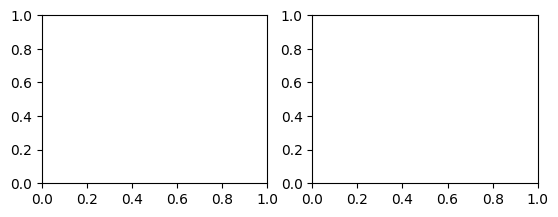

In [361]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)


In [362]:
import seaborn as sns

In [363]:
scouting_data['Pros'].unique()

array(['Speed', 'Unknown', 'Skill', 'Marking', 'Handling', 'Heading',
       'Intelligence', 'Team Player', 'Aerial Reach', 'Athleticism',
       'Rushing Out (Tendency)'], dtype=object)

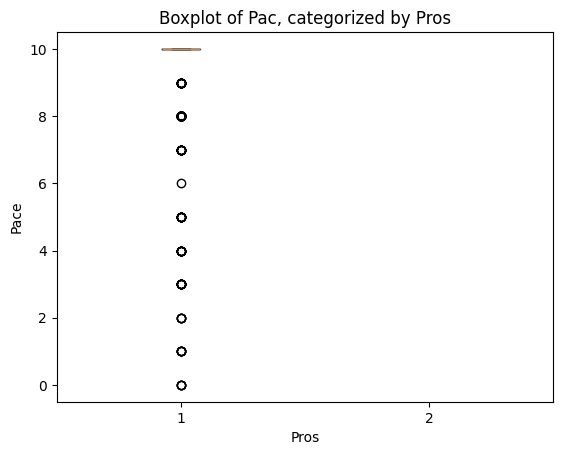

In [364]:
scouting_data['Pros_cat'] = scouting_data['Pros'].astype("category").cat.codes
data = [scouting_data['Pros_cat'] ,scouting_data['Pac']]
plt.title("Boxplot of Pac, categorized by Pros")
plt.xlabel("Pros")
plt.ylabel("Pace")
# plt.boxplot(scouting_data['Pac'])
plt.boxplot(data)
plt.show()

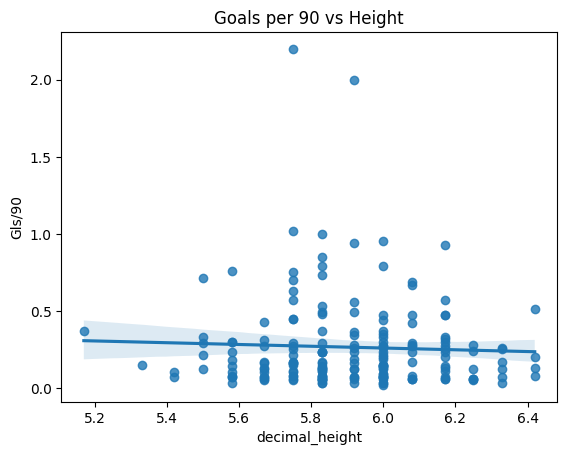

In [365]:
# WTF More goals per 90 due to height?
ax = sns.regplot(y='Gls/90', x='decimal_height', data = scouting_data).set(title="Goals per 90 vs Height")

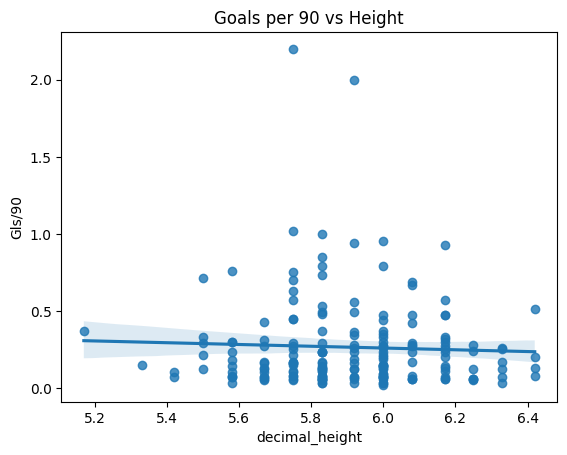

In [366]:
# WTF More goals per 90 due to height?
ax = sns.regplot(y='Gls/90', x='decimal_height', data = scouting_data).set(title="Goals per 90 vs Height")

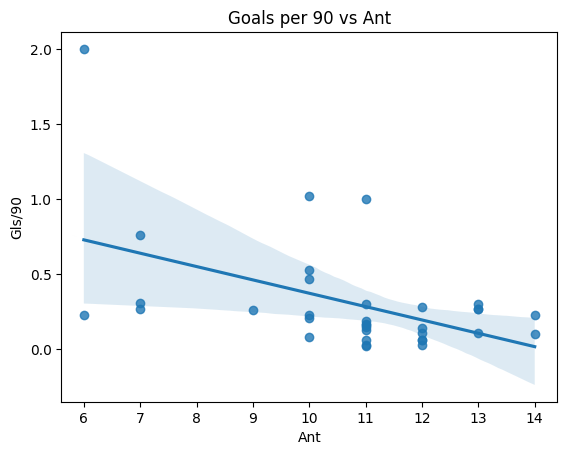

In [367]:
# WTF Ant is negative with Goals per 90
ax = sns.regplot(y='Gls/90', x='Ant', data = scouting_data).set(title="Goals per 90 vs Ant")

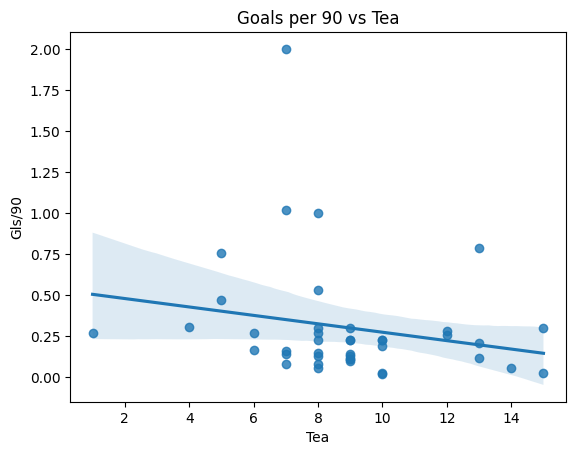

In [368]:
# WTF More goals per 90 due to height?
ax = sns.regplot(y='Gls/90', x='Tea', data = scouting_data).set(title="Goals per 90 vs Tea")

In [369]:
scouting_data['Best Duty']

0       Attack
1      Support
2      Support
3      Stopper
4      Support
        ...   
675    Support
676    Support
677    Support
678     Defend
679     Defend
Name: Best Duty, Length: 680, dtype: object

In [ ]:
# def utf_encode(string_to_convert):
#     return string_to_convert.encode("utf-8")

# scouting_data['Name'] = scouting_data['Name'].apply(utf_encode)

# scouting_data['Name']

In [426]:
query_term = 'Support'
# scouting_data.query?
# scouting_data.query('Tea > 10')
scouting_data.query('`Best Duty` == "Attack"') 

,Name,UID,Best Pos,Best Role,Best Duty,Pros,Cons,On Loan From,Asking Price,Gls,...,Clear,CCC,Ch C/90,Blk/90,Blk,Asts/90,Aer A/90,Inf,decimal_height,decimal_weight
0,b'Islam Abdel Aziz',2000035786,AM (L),Winger,Attack,Speed,Intelligence,,-,1.0,...,0.0,0.0,NaN,NaN,0.0,NaN,NaN,Wnt,5.75,147
5,b'Mohamed Mohamed',2002090713,"M/AM (RL), ST (RL)",Winger,Attack,Unknown,Unknown,,-,1.0,...,0.0,1.0,NaN,NaN,0.0,NaN,NaN,Yth,5.58,136
10,b'Wagih Abdelhakim',2000069340,AM (R),Inverted Winger,Attack,Skill,Athleticism,,-,10.0,...,5.0,2.0,0.12,0.11,2.0,0.16,0.96,,5.83,149
11,b'Belal El Sayed',2000119358,M (C),Mezzala,Attack,Unknown,Unknown,,-,1.0,...,4.0,0.0,NaN,0.10,2.0,0.16,0.42,,5.83,160
16,b'Mohamed Kamel',2000119331,ST (C),Poacher,Attack,Unknown,Unknown,,-,9.0,...,2.0,1.0,0.34,0.05,1.0,0.05,1.79,Wnt,6.17,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,b'Mohamed Hamdy',2002237608,ST (C),Advanced Forward,Attack,Unknown,Unknown,,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yth,6.42,163
652,b'Mahmoud Mohamed',2002238010,ST (C),Poacher,Attack,Unknown,Unknown,,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wnt,5.58,123
659,b'Essam Ekramy',2002238143,"M/AM (RL), ST (RL)",Inside Forward,Attack,Unknown,Unknown,,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yth,5.67,127
661,b'Abdo Mahmoud',2002238145,ST (C),Poacher,Attack,Unknown,Unknown,,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yth,6.42,167
